<a href="https://colab.research.google.com/github/Shubham-Niture/S-ML-Assignments/blob/main/Group_Exercise_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load a Real Dataset
def load_real_dataset():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    df = pd.read_csv(url, sep=';')
    # Convert wine quality to binary classification (good: quality >= 7, bad: quality < 7)
    df['quality'] = (df['quality'] >= 7).astype(int)
    X = df.drop('quality', axis=1).values
    y = df['quality'].values
    return X, y

In [3]:
# Step 2: Preprocess the Data
X, y = load_real_dataset()
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Step 3: Define Models

# Feedforward Neural Network (FFNN)
def build_ffnn(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Convolutional Neural Network (CNN)
def build_cnn(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Reshape((input_shape, 1), input_shape=(input_shape,)),
        tf.keras.layers.Conv1D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Recurrent Neural Network (RNN)
def build_rnn(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Reshape((input_shape, 1), input_shape=(input_shape,)),
        tf.keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Long Short-Term Memory (LSTM)
def build_lstm(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Reshape((input_shape, 1), input_shape=(input_shape,)),
        tf.keras.layers.LSTM(32, activation='relu', return_sequences=False),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

In [5]:
# Step 4: Train and Evaluate Models
def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    return history, accuracy

# Models to Evaluate
models = {
    "FFNN": build_ffnn(X_train.shape[1]),
    "CNN": build_cnn(X_train.shape[1]),
    "RNN": build_rnn(X_train.shape[1]),
    "LSTM": build_lstm(X_train.shape[1])
}

histories = {}
accuracies = {}

for name, model in models.items():
    print(f"Training {name}...")
    history, accuracy = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    histories[name] = history
    accuracies[name] = accuracy


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training FFNN...
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Training CNN...
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training RNN...
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Training LSTM...
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


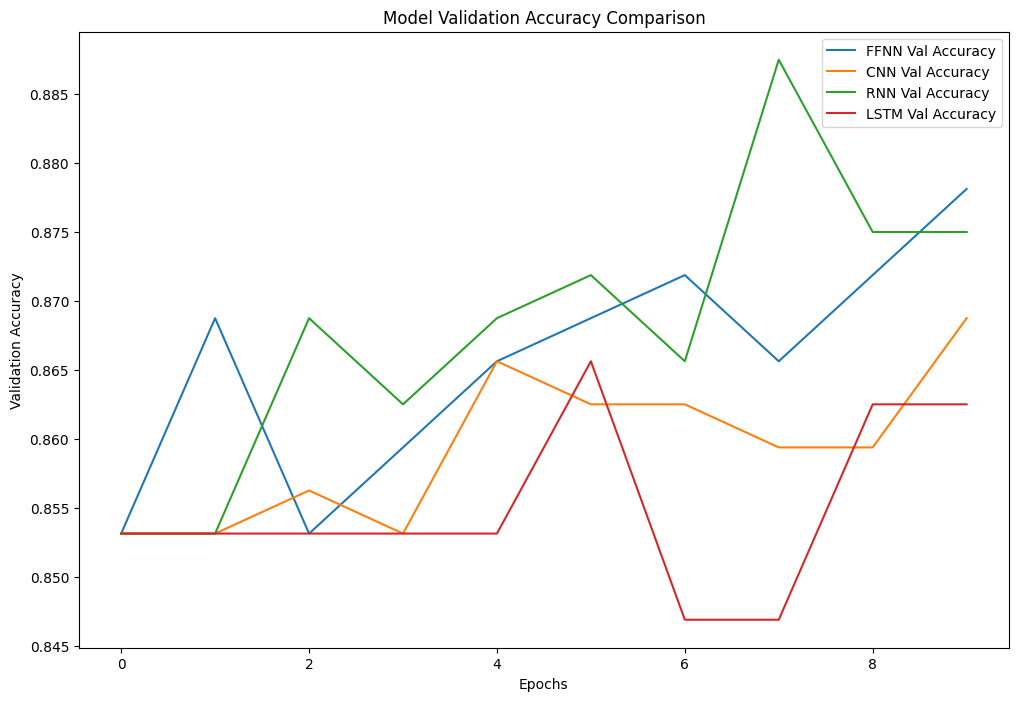

Model Accuracies:
FFNN: 0.8781
CNN: 0.8688
RNN: 0.8750
LSTM: 0.8625


In [6]:
# Step 5: Visualization and Comparison
plt.figure(figsize=(12, 8))

for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{name} Val Accuracy')

plt.title('Model Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

print("Model Accuracies:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")

In [7]:
# Identify Best Performing Model
best_model = max(accuracies, key=accuracies.get)
print(f"\nBest Performing Model: {best_model} with accuracy {accuracies[best_model]:.4f}")


Best Performing Model: FFNN with accuracy 0.8781
